In [4]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import files 
uploaded = files.upload()

Saving StudentsPerformance.csv to StudentsPerformance.csv


In [8]:
#1. Find out how many males and females participated in the test.
import pandas as pd
df = pd.read_csv('StudentsPerformance.csv')
df.head()
female = 0
male = 0
for row in df:
  if df['gender'].any()=='female':
    female = female +1
  else:
      male = male+1
print(df['gender'].value_counts()['male'])
print(df['gender'].value_counts()['female'])

482
518


In [16]:
df['average score'] = (df['math score'] + df['writing score'] + df['reading score']) / 3
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group C,some high school,free/reduced,none,0,17,10,9.000000
1,female,group B,high school,free/reduced,none,8,24,23,18.333333
2,female,group B,some high school,free/reduced,none,18,32,28,26.000000
3,female,group B,some college,standard,none,11,38,32,27.000000
4,female,group C,some college,free/reduced,none,22,39,33,31.333333
...,...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81,89.000000
996,male,group A,some college,standard,completed,100,96,86,94.000000
997,male,group D,some college,standard,completed,100,97,99,98.666667
998,male,group E,associate's degree,free/reduced,completed,100,100,93,97.666667


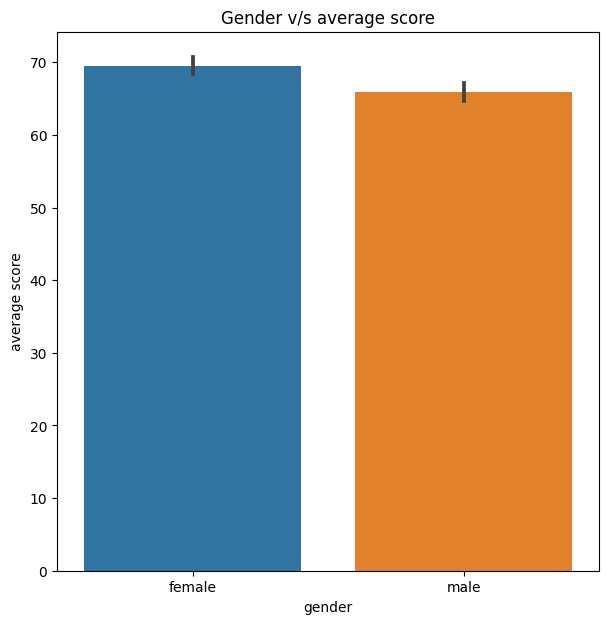

In [17]:
plt.figure(figsize= (7,7))
plt.title('Gender v/s average score')
sns.barplot(x = 'gender', 
            y = 'average score',
            data = df);

In Male 482 members and In Female 518 Members are attened the test
Female gender has higher average score than Male gender

In [9]:
#2. What do you think about the students' parental level of education?
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

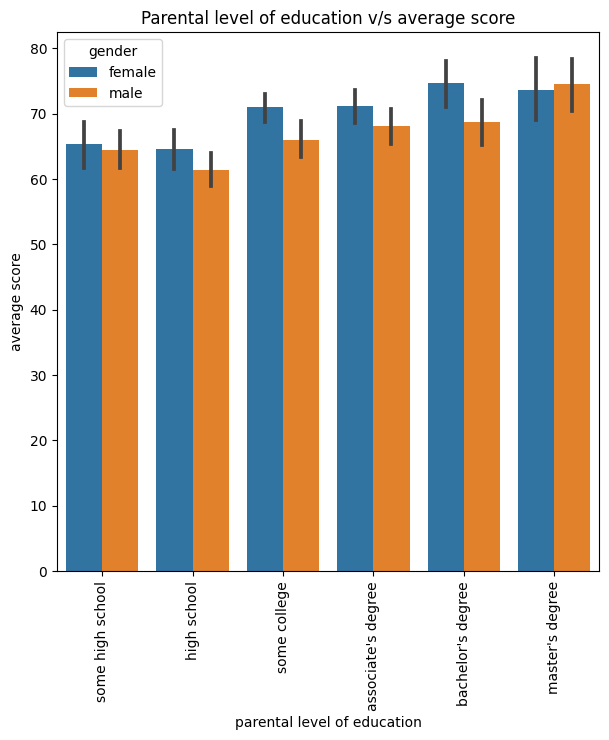

In [18]:
plt.figure(figsize= (7,7))
plt.title('Parental level of education v/s average score')
plt.xticks(rotation = 90)
sns.barplot(x = 'parental level of education', 
            y = 'average score', 
            data = df,
            hue = 'gender',
            palette = 'tab10');

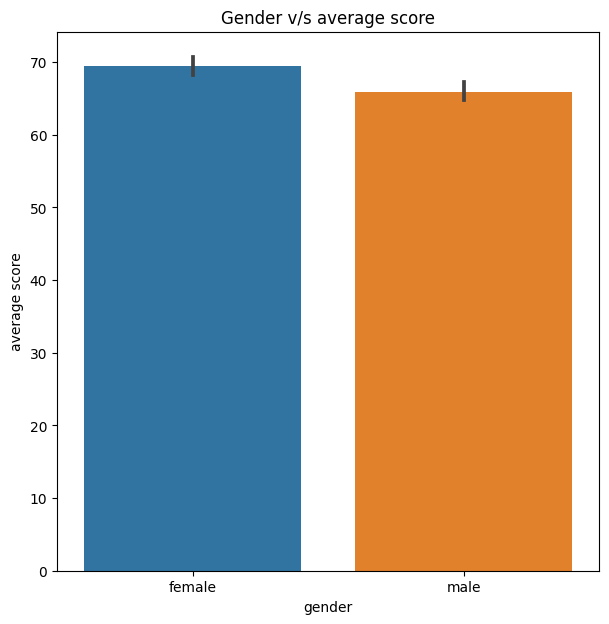

In [19]:
#3. Who scores the most on average for math, reading and writing based on Gender,Test preparation course
# Gender
plt.figure(figsize= (7,7))
plt.title('Gender v/s average score')
sns.barplot(x = 'gender', 
            y = 'average score',
            data = df);

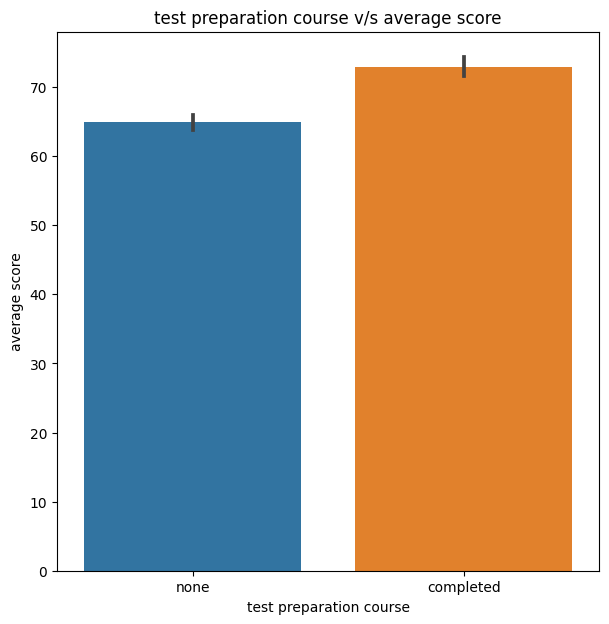

In [21]:
#Test preparation 
df['test preparation course'].value_counts()
plt.figure(figsize= (7,7))

plt.title('test preparation course v/s average score')

sns.barplot(x = 'test preparation course', 
            y = 'average score', 
            data = df);

In [22]:
#4. What do you think about the scoring variation for math, reading and writing based on Gender, Test preparation course
#Gender
df1 = df.groupby(['gender','parental level of education'])[['reading score', 'math score', 'writing score']].mean()
df1

reading score  math score  writing score
gender parental level of education                                          
female associate's degree               74.120690   65.250000      74.000000
       bachelor's degree                77.285714   68.158730      78.380952
       high school                      68.202128   58.840426      66.691489
       master's degree                  76.805556   66.500000      77.638889
       some college                     73.550847   65.186441      74.050847
       some high school                 69.010989   58.780220      68.285714
male   associate's degree               67.622642   70.962264      65.688679
       bachelor's degree                68.090909   70.581818      67.654545
       high school                      61.284314   64.568627      58.450980
       master's degree                  74.608696   76.130435      72.608696
       some college                     65.212963   69.250000      63.555556
       some high school                 64.431818   67.636364      61.375000

In [23]:
#Test preparation course
df1 = df.groupby(['parental level of education','test preparation course'])[['reading score', 'math score', 'writing score']].mean()
df1.sort_values('writing score', ascending = False)

,,reading score,math score,writing score
parental level of education,test preparation course,,,
master's degree,completed,79.950000,72.100000,80.100000
bachelor's degree,completed,76.739130,73.282609,78.695652
associate's degree,completed,76.414634,72.085366,77.182927
some college,completed,76.506494,71.922078,77.090909
master's degree,none,73.897436,69.307692,73.410256
some high school,completed,70.779221,66.493506,70.363636
bachelor's degree,none,70.611111,66.736111,69.986111
high school,completed,68.196429,65.464286,68.428571
associate's degree,none,67.857143,65.571429,65.842857


In [41]:
#5. The management needs your help to give bonus points to the top 25% of students based on their math score, so how will you help the management to achieve this.
average_score_df = df[df ['math score']>= 25][df.columns]
average_score_df.head(25)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
7,female,group D,associate's degree,free/reduced,none,26,31,38,31.666667
9,female,group C,high school,standard,none,29,29,30,29.333333
10,female,group C,some high school,free/reduced,completed,29,40,44,37.666667
11,female,group D,bachelor's degree,free/reduced,none,29,41,47,39.000000
12,female,group B,some high school,standard,completed,32,51,44,42.333333
13,female,group C,some college,free/reduced,none,32,39,33,34.666667
14,female,group E,some high school,free/reduced,none,32,34,38,34.666667
15,female,group C,high school,free/reduced,none,33,41,43,39.000000
16,female,group A,high school,free/reduced,completed,34,48,41,41.000000
17,female,group C,high school,free/reduced,none,34,42,39,38.333333
